<center>

## DiploDatos: Aprendizaje No Supervisado

## Agrupamiento con el DataSet FIFA21 Archivo players_21.csv recomendado en SLACK por Yanina Iberra

Grupo 7

## 1.Inicialización_del_Entorno

In [2]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)

In [3]:
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt

## 2.Exploración_de_la_Base

In [6]:
df = pd.read_csv('players_21.csv')

print(f'Dimensiones: {df.shape}')

Dimensiones: (18944, 106)


In [7]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

In [8]:
# Variables Auxiliares.
name = 'short_name'
age = 'age'
country = 'nationality'
club = 'club_name'
league = 'league_name'
position = 'team_position'
overall = 'overall'
potential = 'potential'

description = [name, age, country, club, league, position, overall, potential]

Existen **7** grupos de habilidades:

- `attacking`
- `defending`
- `goalkeeping`
- `skill`
- `power`
- `movement`
- `mentality`

In [9]:
skillGroup = ('attacking',
              'defending',
              'goalkeeping',
              'skill',
              'power',
              'movement',
              'mentality')

skillRating = {}

# Veamos las habilidades con las que estamos trabajando...
for g in skillGroup:
    print(f'>>> {g.upper()}')
    ix = 0
    # Inicializamos el grupo de habilidades.
    skillRating[g] = []
    # Iteramos sobre el conjunto de columnas del DF.
    for c in df.columns[40:100]:
        if c.startswith(g):
            print(f'\t{ix}: {c}')
            ix += 1
            # Almacenamos la habilidad en el grupo.
            skillRating[g].append(c)

>>> ATTACKING
	0: attacking_crossing
	1: attacking_finishing
	2: attacking_heading_accuracy
	3: attacking_short_passing
	4: attacking_volleys
>>> DEFENDING
	0: defending_marking
	1: defending_standing_tackle
	2: defending_sliding_tackle
>>> GOALKEEPING
	0: goalkeeping_diving
	1: goalkeeping_handling
	2: goalkeeping_kicking
	3: goalkeeping_positioning
	4: goalkeeping_reflexes
>>> SKILL
	0: skill_dribbling
	1: skill_curve
	2: skill_fk_accuracy
	3: skill_long_passing
	4: skill_ball_control
>>> POWER
	0: power_shot_power
	1: power_jumping
	2: power_stamina
	3: power_strength
	4: power_long_shots
>>> MOVEMENT
	0: movement_acceleration
	1: movement_sprint_speed
	2: movement_agility
	3: movement_reactions
	4: movement_balance
>>> MENTALITY
	0: mentality_aggression
	1: mentality_interceptions
	2: mentality_positioning
	3: mentality_vision
	4: mentality_penalties
	5: mentality_composure


**Observación**

La variable `overall` se calcula usando otras variables de desempeño del jugador (*skillRating*).
Algunas de las cuales serían...

- `attacking_finishing`
- `defending_marking`
- `goalkeeping_diving`
- `skill_dribbling`
- `power_jumping`
- `movement_acceleration`
- `mentality_positioning`
- ...

La variable `overall` es discreta, así como las otras de desempeño según habilidad, tomando valores enteros entre **0** y **100**.

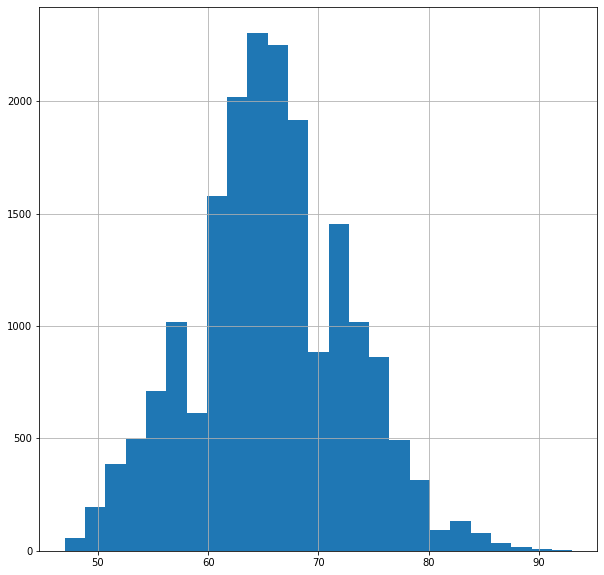

In [10]:
df["overall"].hist(bins=25, figsize=(10, 10));

**Histograma de la variable `overall` (Desempeño Global)**
UN PROMEDIO DE ALREDEDOR de 66 a 68


A simple vista, parece que la mayoría de los jugadores tienen un `overall` entre **60** y **80**.

In [11]:
bestPlayers = df.iloc[df.groupby(df[position])[overall].idxmax()]

bestPlayers[description].sort_values(overall, ascending=False)

,short_name,age,nationality,club_name,league_name,team_position,overall,potential
0,L. Messi,33,Argentina,FC Barcelona,Spain Primera Division,CAM,93,93
1,Cristiano Ronaldo,35,Portugal,Juventus,Italian Serie A,LS,92,92
2,J. Oblak,27,Slovenia,Atlético Madrid,Spain Primera Division,GK,91,93
3,R. Lewandowski,31,Poland,FC Bayern München,German 1. Bundesliga,ST,91,91
5,K. De Bruyne,29,Belgium,Manchester City,English Premier League,RCM,91,91
4,Neymar Jr,28,Brazil,Paris Saint-Germain,French Ligue 1,LW,91,91
8,V. van Dijk,28,Netherlands,Liverpool,English Premier League,LCB,90,91
11,M. Salah,28,Egypt,Liverpool,English Premier League,RW,90,90
13,S. Agüero,32,Argentina,Manchester City,English Premier League,SUB,89,89
17,Casemiro,28,Brazil,Real Madrid,Spain Primera Division,CDM,89,89


**Mejores jugadores según `team_position` (Posición en el Club)**

Tanto *Messi* como *Ronaldo* son los mejores jugadores en su posición, como en el juego.

In [12]:
pd.DataFrame(df[position].value_counts().sort_index()).sort_values(position, ascending=False)

,team_position
SUB,8065
RES,3163
GK,681
LCB,681
RCB,681
LB,553
RB,553
ST,452
RCM,425
LCM,425


**Conteo de jugadores según `team_position` (Posición en el Club)**

Parece haber un exceso de **SUB** y **RES** en el juego.
Lo cual resulta lógico ya que un equipo puede tener una gran cantidad de jugadores suplentes y de jugadores reserva.

También hay un enorme número de **GK** (GoalKeepers) y **LCB**/**RCB** (Left/Right Center Back), aunque también es esperable ya que son posiciones esenciales en cualquier equipo.

Por último, notamos que hay muy pocos **CF**/**LF**/**RF** (Center/Left/Right Forwards), y **LAM**/**RAM** (Left/Right Attacking Midfielders).
Es posible que existan demasiadas posiciones, y sea complicado clasificar jugadores en estos puestos.

In [13]:
clubAVG_Overall = df.groupby([club, league])[overall].mean().reset_index()

clubAVG_Overall.sort_values(overall, ascending=False).head(10)

,club_name,league_name,overall
216,FC Bayern München,German 1. Bundesliga,81.045455
489,Real Madrid,Spain Primera Division,79.250000
131,Chelsea,English Premier League,79.212121
214,FC Barcelona,Spain Primera Division,78.909091
374,Liverpool,English Premier League,78.575758
330,Inter,Italian Serie A,78.000000
387,Manchester United,English Premier League,77.818182
386,Manchester City,English Premier League,77.484848
339,Juventus,Italian Serie A,77.483871
612,Tottenham Hotspur,English Premier League,77.242424


## 3.Preparación_de_los_Datos

Retiramos jugadores con bajo Desempeño Global (`overall`), y consideramos variables de desempeño por habilidad (*skillRating*).

In [14]:
# Conservamos a los jugadores buenos.
minOverall = 70
bestDF = df[(df[overall] > minOverall)]

print(f'#Categorías: {len(skillRating)}')
total = 0
for k, v in skillRating.items():
    print(f'#Habilidades: {len(v)}, en Categoría: {k}')
    total += len(v)

print(f'Total: {total}')

#Categorías: 7
#Habilidades: 5, en Categoría: attacking
#Habilidades: 3, en Categoría: defending
#Habilidades: 5, en Categoría: goalkeeping
#Habilidades: 5, en Categoría: skill
#Habilidades: 5, en Categoría: power
#Habilidades: 5, en Categoría: movement
#Habilidades: 6, en Categoría: mentality
Total: 34


In [15]:
onlySkills = []

for skills in skillRating.values():
    onlySkills += skills

# Sólo con desempeños según habilidades.
skillsDF = bestDF[onlySkills]

skillsDF.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure
0,85,95,70,91,88,NaN,35,24,6,11,15,14,8,96,93,94,91,96,86,68,72,69,94,91,80,91,94,95,44,40,93,95,75,96
1,84,95,90,82,86,NaN,32,24,7,11,15,14,11,88,81,76,77,92,94,95,84,78,93,87,91,87,95,71,63,29,95,82,84,95
2,13,11,15,43,13,NaN,12,18,87,92,78,90,90,12,13,14,40,30,59,78,41,78,12,43,60,67,88,49,34,19,11,65,11,68
3,71,94,85,84,89,NaN,42,19,15,6,12,8,10,85,79,85,70,88,89,84,76,86,85,77,78,77,93,82,81,49,94,79,88,88
4,85,87,62,87,87,NaN,30,29,9,9,15,15,11,95,88,89,81,95,80,62,81,50,84,94,89,96,91,83,51,36,87,90,92,93


## 4.Exploratorio_Visual_para_Clustering

Visualizamos los datos de a dos variables numéricas.

**Consigna de trabajo en grupo:**
Buscar agrupamiento de datos usando las variables en *skillRating* de a pares.

In [17]:
# Diferenciamos a los mejores jugadores.
topOverall = 85
bool_TOP = bestDF[overall] > topOverall

# Elegimos dos variables cualquiera.
skill1 = skillRating['skill'][1] # skill_curve
skill2 = skillRating['mentality'][5] # mentality_composure

Gráfica con `matplotlib.pyplot`.
Liviana pero más sencilla.

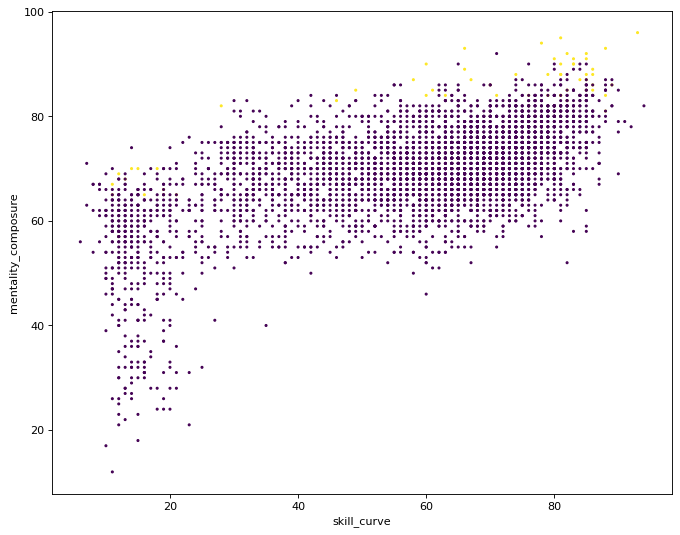

In [18]:
plt.figure(figsize=(10, 8), dpi=80)

plt.scatter(x=skillsDF[skill1],
            y=skillsDF[skill2],
            s=3,
            c=bool_TOP
           )

plt.xlabel(skill1)
plt.ylabel(skill2)
plt.show()

**Consigna de trabajo en grupo**

Buscar agrupamientos de jugadores de manera intuitiva por cercanía (en espacios **bidimensionales**, de a dos variables por vez).
Si se encuentran, tratar de explicarlos visualmente con alguna característica.

En la próxima gráfica, similar a la anterior, también se diferencian los mejores jugadores y alguna propiedad de interés.

Se puede ubicar también un jugador, un equipo, o un país en particular.

## 5.Búsqueda_de_Agrupamientos

**1er Agrupamiento**


Vamos a separar a los **arqueros** del **resto de los jugadores** de campo.

In [19]:
# Elegimos dos variables arbitrarias.
skill1 = skillRating['attacking'][2] # attacking_heading_accuracy
skill2 = skillRating['goalkeeping'][0] # goalkeeping_diving

Notar que cualquier habilidad propia de arquero (`goalkeeping_diving` en este caso), comparada con alguna otra habilidad cualquiera de jugador de campo (`attacking_heading_accuracy` en este caso), sería suficiente para separar estos *clusters*.

In [20]:
top = go.Scatter(x=skillsDF.loc[bool_TOP, skill1],
                 y=skillsDF.loc[bool_TOP, skill2],
                 name='Top Players',
                 text=bestDF.loc[bool_TOP, position],
                 textfont=dict(family='sans serif', size=8, color='black'),
                 opacity=0.9,
                 marker=dict(color=palette[0], size=8),
                 mode='markers+text'
                )

data = [average, top]

layout = go.Layout(title='FIFA 2021 Players: ARQUEROS (GK) vs. The World',
                   titlefont=dict(size=20),
                   xaxis=dict(title=skill1),
                   yaxis=dict(title=skill2),
                   autosize=False,
                   width=900,
                   height=900
                  )

fig = go.Figure(data=data, layout=layout)
fig.show()

NameError: ignored

Es evidente la separación en dos *clusters* de nuestro conjunto de datos.

- Los arqueros tendrán un valor alto de `goalkeeping_diving` y un valor bajo en `attacking_heading_accuracy`.

- Los jugadores de campo tendrán un valor bajo de `goalkeeping_diving` y un valor cualquier en `attacking_heading_accuracy` (ya que no todo jugador de campo cumple un rol ofensivo).

OFENSIVOS DEFENSIVOS

In [21]:
# Intento de reducir el ruido en el clustering.
noisyPositions = ['GK', 'SUB', 'RES']

# Conservamos los jugadores buenos (en posiciones NO ruidosas).
bestDF = df[(df[overall] > minOverall) & (~df[position].isin(noisyPositions))]

# Sólo con desempeños según habilidades.
skillsDF = bestDF[onlySkills]

Utilizando nuestros conocimientos de dominio, definiremos manualmente los siguientes conjuntos de posiciones.

In [22]:
skill3 = skillRating['defending'][1] # defending_sliding_tackle y 
skill4 = skillRating['attacking'][1] # attacking_finishing

In [23]:
defensivePositions = ['LCB', 'RCB', 'LB', 'RB', 'CB', 'LDM', 'RDM', 'CDM']
offensivePositions = ['ST', 'LS', 'RS', 'RW', 'LW', 'LAM', 'RAM', 'CAM', 'LF', 'RF', 'CF']
otherPositions = ['LCM', 'RCM', 'LM', 'RM', 'CM', 'LWB', 'RWB']

defensiveDF = bestDF[position].isin(defensivePositions)
offensiveDF = bestDF[position].isin(offensivePositions)
otherDF = bestDF[position].isin(otherPositions)

In [24]:
defensive = go.Scatter(x=skillsDF.loc[defensiveDF, skill3],
                       y=skillsDF.loc[defensiveDF, skill4],
                       name='Defensive Players',
                       text=bestDF.loc[defensiveDF, position],
                       opacity=0.8,
                       marker=dict(color=palette[0], size=4),
                       mode='markers'
                      )

offensive = go.Scatter(x=skillsDF.loc[offensiveDF, skill3],
                       y=skillsDF.loc[offensiveDF, skill4],
                       name='Offensive Players',
                       text=bestDF.loc[offensiveDF, position],
                       opacity=0.8,
                       marker=dict(color=palette[1], size=4),
                       mode='markers'
                      )

other = go.Scatter(x=skillsDF.loc[otherDF, skill3],
                   y=skillsDF.loc[otherDF, skill4],
                   name='Other Players',
                   text=bestDF.loc[otherDF, position],
                   opacity=0.4,
                   marker=dict(color=palette[2], size=2),
                   mode='markers'
                  )

data = [defensive, offensive, other]

layout = go.Layout(title='FIFA Players 2021: Defensive vs. Offensive',
                   titlefont=dict(size=20),
                   xaxis=dict(title=skill3),
                   yaxis=dict(title=skill4),
                   autosize=False,
                   width=900,
                   height=900
                  )

fig = go.Figure(data=data, layout=layout)
fig.show()

NameError: ignored

hay dos grupos (?) 

- Los jugadores defensivos tienen, por lo general, un valor alto de `defending_sliding_tackle` y un valor bajo en `attacking_finishing`.


sigue sin notarse una diferencia clara entre ambos grupos.

HABRA QUE USAR TECNICAS DE CLUSTERING "NO DE A PARES"
